<a href="https://colab.research.google.com/github/ibrahimaji12/Tubes4/blob/main/TubesPython4_IbrahimAji.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
def Pathloss(frek, area, tinggi_tx, tinggi_rx,jarak):
  if frek in range(150,1501):
    c1=69.55
    c2=26.16
  elif frek in range(1501,2001):
    c1=46.3
    c2=33.9

  if area == 'Urban':
    cm=0
  elif area == 'Suburban':
    cm= -2*((np.log10((frek/28)**2))-5.4)
  elif area == 'Open':
    cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
  else :
    cm='Area Salah Coba lagi'

  ahr = (1.1*np.log10(frek)-0.7)*tinggi_rx-(1.56*np.log10(frek)-1.8)
  Lp = c1 + (c2*np.log10(frek))-(13.83*np.log(tinggi_tx))-ahr+((44.9-6.55*np.log10(tinggi_tx))*np.log10(jarak))-cm

  return Lp

In [33]:
def dt(Ptx, PL, Gain_tx, Gain_rx):
  Ptx=10*np.log10(Ptx)
  Prx=Ptx - PL + Gain_tx + Gain_rx
  Prx=10**(Prx/10)

  return Prx

In [34]:
f=1800
Gain_tx=10
Gain_rx=2
area1='Urban'
area2='Suburban'
area3= 'Open'
pem = 80
pen = 1.5
jmin = 300
jmax = 1000
user = 200
j = np.random.randint(jmin,jmax,user)

In [35]:
kurv1=dt(30000,Pathloss(f,area1,pem,pen,j),Gain_tx,Gain_rx)
kurv2=dt(30000,Pathloss(f,area2,pem,pen,j),Gain_tx,Gain_rx)
kurv3=dt(30000,Pathloss(f,area3,pem,pen,j),Gain_tx,Gain_rx)

In [36]:
j_sort=j[np.argsort(j)]
loc1_sort=kurv1[np.argsort(j)]
loc2_sort=kurv2[np.argsort(j)]
loc3_sort=kurv3[np.argsort(j)]

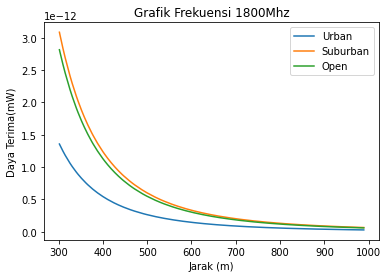

In [37]:
plt.figure()
plt.plot(j_sort,loc1_sort,label="Urban")
plt.plot(j_sort,loc2_sort,label="Suburban")
plt.plot(j_sort,loc3_sort,label="Open")
plt.legend()
plt.title("Grafik Frekuensi 1800Mhz")
plt.xlabel("Jarak (m)")
plt.ylabel("Daya Terima(mW)")
plt.show()

In [38]:
f1=700
f2=900
f3=1800
Gain_tx=10
Gain_rx=2
area='Urban'
pem = 80
pen = 1.5
jmin = 300
jmax = 1000
user = 200
j = np.random.randint(jmin,jmax,user)

In [39]:
GraphFrek1=dt(30000,Pathloss(f1,area,pem,pen,j),Gain_tx,Gain_rx)
GraphFrek2=dt(30000,Pathloss(f2,area,pem,pen,j),Gain_tx,Gain_rx)
GraphFrek3=dt(30000,Pathloss(f3,area,pem,pen,j),Gain_tx,Gain_rx)

In [40]:
j_sort=j[np.argsort(j)]
frek1_sort=GraphFrek1[np.argsort(j)]
frek2_sort=GraphFrek2[np.argsort(j)]
frek3_sort=GraphFrek3[np.argsort(j)]

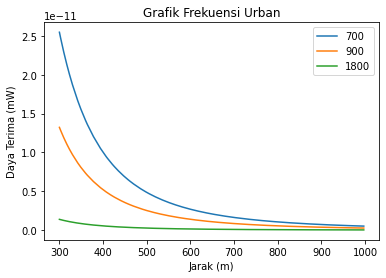

In [41]:
plt.figure()
plt.plot(j_sort,frek1_sort,label="700")
plt.plot(j_sort,frek2_sort,label="900")
plt.plot(j_sort,frek3_sort,label="1800")
plt.legend()
plt.title("Grafik Frekuensi Urban")
plt.xlabel("Jarak (m)")
plt.ylabel("Daya Terima (mW)")
plt.show()

In [42]:
def SNR(dt,Bw):
  ns= -174 + 10*np.log10(Bw)
  ns= 10**(ns/10)
  snr= dt/ns

  return snr

In [43]:
f=1800
Gain_tx=10
Gain_rx=2
area1='Urban'
area2='Suburban'
area3= 'Open'
pem = 80
pen = 1.5
jmin = 300
jmax = 1000
user = 200
j = np.random.randint(jmin,jmax,user)

In [44]:
kurv1=SNR(dt(30000,Pathloss(f,area1,pem,pen,j),Gain_tx,Gain_rx),5000000)
kurv2=SNR(dt(30000,Pathloss(f,area2,pem,pen,j),Gain_tx,Gain_rx),5000000)
kurv3=SNR(dt(30000,Pathloss(f,area3,pem,pen,j),Gain_tx,Gain_rx),5000000)

In [45]:
j_sort=j[np.argsort(j)]
loc1_sort=kurv1[np.argsort(j)]
loc2_sort=kurv2[np.argsort(j)]
loc3_sort=kurv3[np.argsort(j)]

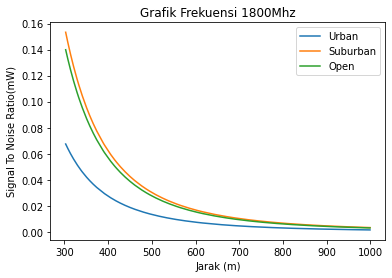

In [46]:
plt.figure()
plt.plot(j_sort,loc1_sort,label="Urban")
plt.plot(j_sort,loc2_sort,label="Suburban")
plt.plot(j_sort,loc3_sort,label="Open")
plt.legend()
plt.title("Grafik Frekuensi 1800Mhz")
plt.xlabel("Jarak (m)")
plt.ylabel("Signal To Noise Ratio(mW)")
plt.show()

In [47]:
f1=700
f2=900
f3=1800
Gain_tx=10
Gain_rx=2
area='Urban'
pem = 80
pen = 1.5
jmin = 300
jmax = 1000
user = 200
j = np.random.randint(jmin,jmax,user)

In [48]:
GraphFrek1=SNR(dt(30000,Pathloss(f1,area,pem,pen,j),Gain_tx,Gain_rx),5000000)
GraphFrek2=SNR(dt(30000,Pathloss(f2,area,pem,pen,j),Gain_tx,Gain_rx),5000000)
GraphFrek3=SNR(dt(30000,Pathloss(f3,area,pem,pen,j),Gain_tx,Gain_rx),5000000)

In [49]:
j_sort=j[np.argsort(j)]
frek1_sort=GraphFrek1[np.argsort(j)]
frek2_sort=GraphFrek2[np.argsort(j)]
frek3_sort=GraphFrek3[np.argsort(j)]

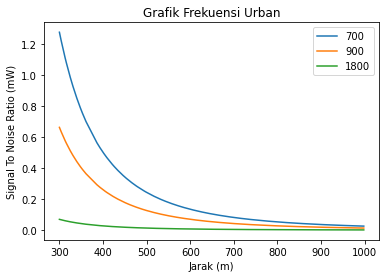

In [50]:
plt.figure()
plt.plot(j_sort,frek1_sort,label="700")
plt.plot(j_sort,frek2_sort,label="900")
plt.plot(j_sort,frek3_sort,label="1800")
plt.legend()
plt.title("Grafik Frekuensi Urban")
plt.xlabel("Jarak (m)")
plt.ylabel("Signal To Noise Ratio (mW)")
plt.show()

In [51]:
def Kc(Sn,Bandwith):
  kapasitas_cellular= Bandwith * np.log2(1+Sn)

  return kapasitas_cellular

In [52]:
f=1800
Gain_tx=10
Gain_rx=2
Bndw=5000000
area1='Urban'
area2='Suburban'
area3= 'Open'
pem = 80
pen = 1.5
jmin = 300
jmax = 1000
user = 200
j = np.random.randint(jmin,jmax,user)

In [53]:
kurv1=Kc(Bndw,SNR(dt(30000,Pathloss(f,area1,pem,pen,j),Gain_tx,Gain_rx),Bndw))
kurv2=Kc(Bndw,SNR(dt(30000,Pathloss(f,area2,pem,pen,j),Gain_tx,Gain_rx),Bndw))
kurv3=Kc(Bndw,SNR(dt(30000,Pathloss(f,area3,pem,pen,j),Gain_tx,Gain_rx),Bndw))

In [54]:
j_sort=j[np.argsort(j)]
loc1_sort=kurv1[np.argsort(j)]
loc2_sort=kurv2[np.argsort(j)]
loc3_sort=kurv3[np.argsort(j)]

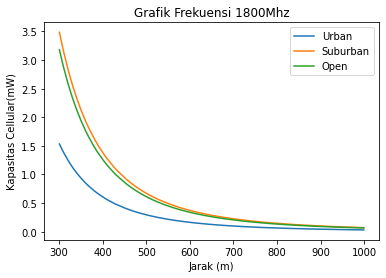

In [55]:
plt.figure()
plt.plot(j_sort,loc1_sort,label="Urban")
plt.plot(j_sort,loc2_sort,label="Suburban")
plt.plot(j_sort,loc3_sort,label="Open")
plt.legend()
plt.title("Grafik Frekuensi 1800Mhz")
plt.xlabel("Jarak (m)")
plt.ylabel("Kapasitas Cellular(mW)")
plt.show()

In [56]:
f1=700
f2=900
f3=1800
Bndw=5000000
Gain_tx=10
Gain_rx=2
area='Urban'
pem = 80
pen = 1.5
jmin = 300
jmax = 1000
user = 200
j = np.random.randint(jmin,jmax,user)

In [57]:
GraphFrek1=Kc(Bndw,SNR(dt(30000,Pathloss(f1,area,pem,pen,j),Gain_tx,Gain_rx),Bndw))
GraphFrek2=Kc(Bndw,SNR(dt(30000,Pathloss(f2,area,pem,pen,j),Gain_tx,Gain_rx),Bndw))
GraphFrek3=Kc(Bndw,SNR(dt(30000,Pathloss(f3,area,pem,pen,j),Gain_tx,Gain_rx),Bndw))

In [58]:
j_sort=j[np.argsort(j)]
frek1_sort=GraphFrek1[np.argsort(j)]
frek2_sort=GraphFrek2[np.argsort(j)]
frek3_sort=GraphFrek3[np.argsort(j)]

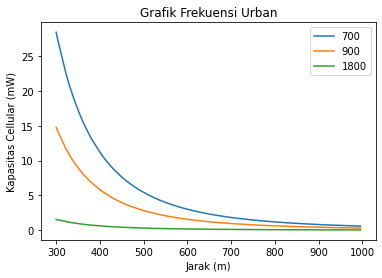

In [59]:
plt.figure()
plt.plot(j_sort,frek1_sort,label="700")
plt.plot(j_sort,frek2_sort,label="900")
plt.plot(j_sort,frek3_sort,label="1800")
plt.legend()
plt.title("Grafik Frekuensi Urban")
plt.xlabel("Jarak (m)")
plt.ylabel("Kapasitas Cellular (mW)")
plt.show()